In [1]:
import sklearn
from sklearn import datasets
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression

In [2]:

boston = datasets.load_boston()


In [3]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
X = df[['NOX']]
y = boston.target #price

In [25]:
# Predict without using Linear Regression

line_fitter = LinearRegression()
line_fitter.fit(X, y)

price_predict = line_fitter.predict(X)  

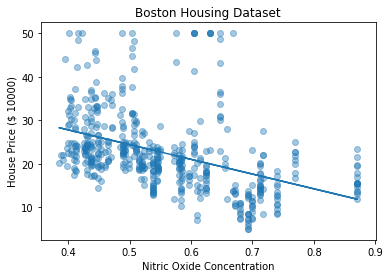

In [26]:
plt.plot(X, price_predict)
plt.scatter(X, y, alpha=0.4)
plt.title("Boston Housing Dataset")
plt.xlabel("Nitric Oxide Concentration")
plt.ylabel("House Price ($ 10000)")
plt.show()

In [60]:
# Predict without using Linear Regression
def b_gradient(x, y, m, b):
    loss = 0
    N = len(x)
    for i in range(N):
        tmp = y[i] - (m * x[i] + b)
        loss += tmp
    gradient = (-2 / N) * loss
    
    return gradient

def m_gradient(x, y, m, b):
    loss = 0
    N = len(x)
    for i in range(N):
        tmp = x[i] * (y[i] - (m * x[i] + b))
        loss += tmp
    gradient = (-2 / N) * loss
    
    return gradient

def fit(x, y, learning_rate, epochs):
    lr = learning_rate
    b = 0
    m = 0
    for i in range(epochs):
        b_gr = b_gradient(x, y, m, b)
        m_gr = m_gradient(x, y, m, b)
        b -= learning_rate * b_gr
        m -= learning_rate * m_gr
    return (m,b)

def predict(x, m, b):
    y = [m * t + b for t in x]
    return y

In [69]:
lr = 0.1
epochs = 1000
m, b = fit(X['NOX'], y, lr, epochs)

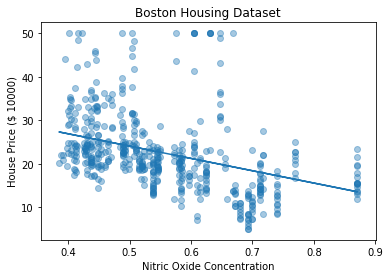

In [70]:
price_predict_2 = predict(X['NOX'], m, b)
plt.plot(X, price_predict_2)
plt.scatter(X, y, alpha=0.4)
plt.title("Boston Housing Dataset")
plt.xlabel("Nitric Oxide Concentration")
plt.ylabel("House Price ($ 10000)")
plt.show()